Business questions and concerns to answer with EDA: 

Are there any problems with the data? 
    Are there Null values? 
    Are there outliers? 
    Is the data sufficient? Sufficient for what kind of analysis?

Is the chemical composition of red and white wines comparable?

Does the chemical composition have any impact on the perceived quality of the wine? 
What are your observations? 


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Datasets

In [12]:
red_wine = pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-red.csv', sep=';')
white_wine =  pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-white.csv', sep= ';')


# Data Wrangling #

In [13]:
##### Data Enriching #####

# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

red_wine['wine_type'] = 'red'

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine['wine_type'] = 'white'


In [14]:
# Data Structuring # 
# This step includes merging datasets, separating single columns into several
# or combining several columns into a single column. 

wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

wines = wines.drop_duplicates()

In [15]:
# Data Cleaning # 
# This step includes: 
# handling missing values 
# removing duplicates
# Standardize formats and input ranges. 
# Change data to correct type.
# Remove outliers 
# Correct misspellings 

wines = wines.drop_duplicates()

wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,5.9,0.26,0.24,2.4,0.046,27.0,132.0,0.99234,3.63,0.73,11.3,5,low,white
6491,8.0,0.34,0.49,9.0,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,8,high,white
6493,5.6,0.28,0.27,3.9,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,medium,white
6494,6.4,0.37,0.20,5.6,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,low,white


# Exploratory Data Analysis 

In [16]:
## Red Wine and White Wine Comparison ## 

#r = red_wine.groupby(by='quality_label').count().iloc[:,0]
w = wines.groupby(by='quality_label').count().iloc[:,0]



quality_label
low       1988
medium    3179
high       153
Name: fixed acidity, dtype: int64

Text(0, 0.5, 'count')

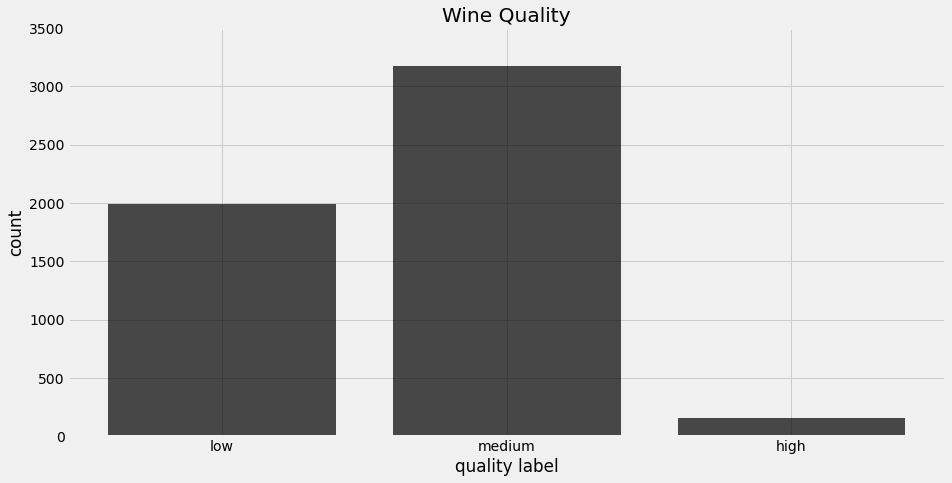

In [17]:
# Using figure and subplot objects 

plt.style.use('fivethirtyeight')

fig = plt.figure()
fig.set_size_inches(14, 7)

ax1 = fig.add_subplot(1,1,1)
ax1.set_ylim(bottom=0, top=3500)
ax1.title.set_text('Wine Quality')
ax1.bar(w.index.categories, w.values, color='k', alpha=0.7)
plt.xlabel('quality label'); plt.ylabel('count')


### Univariate Analysis

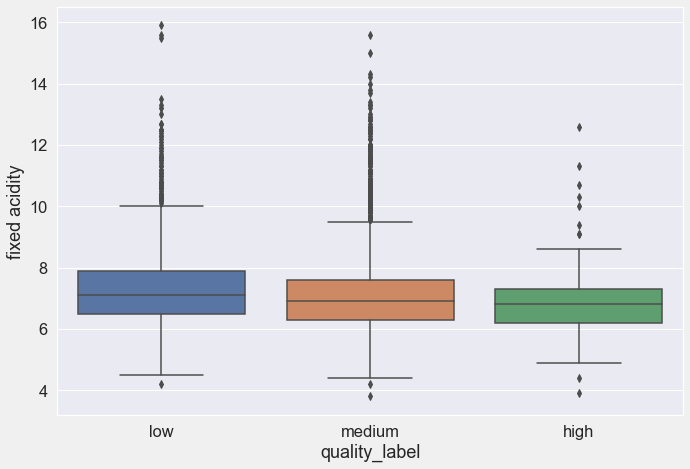

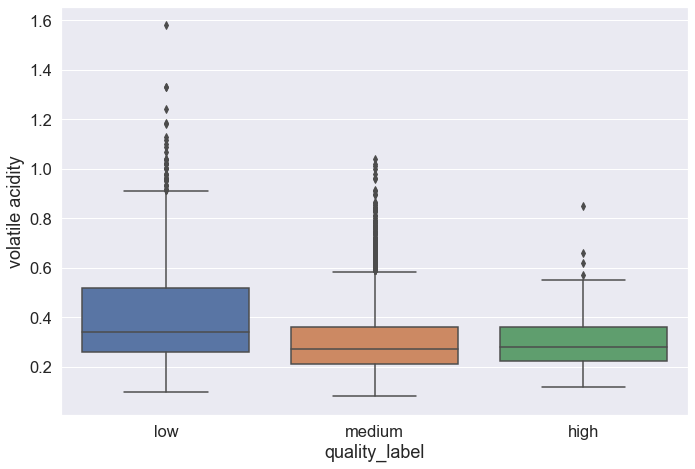

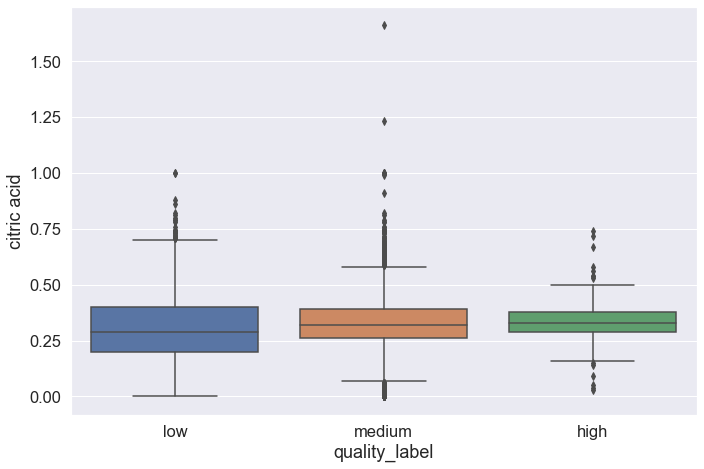

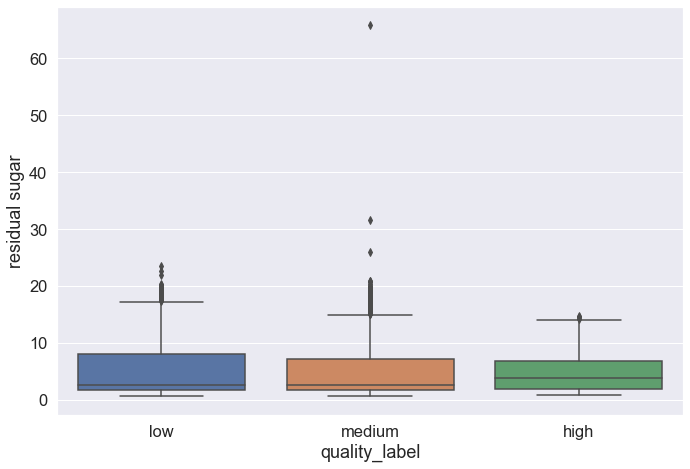

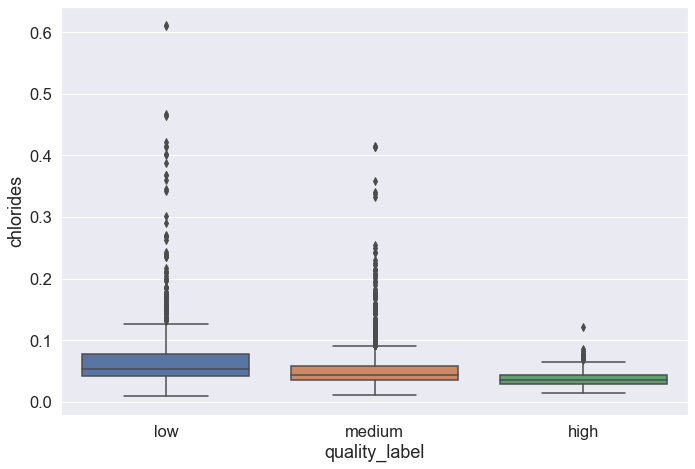

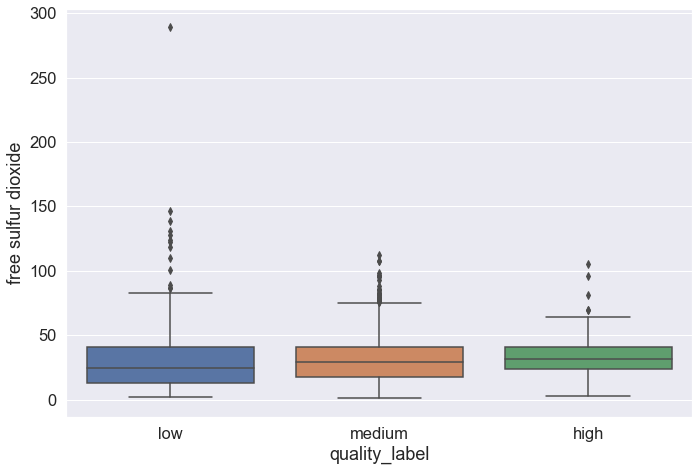

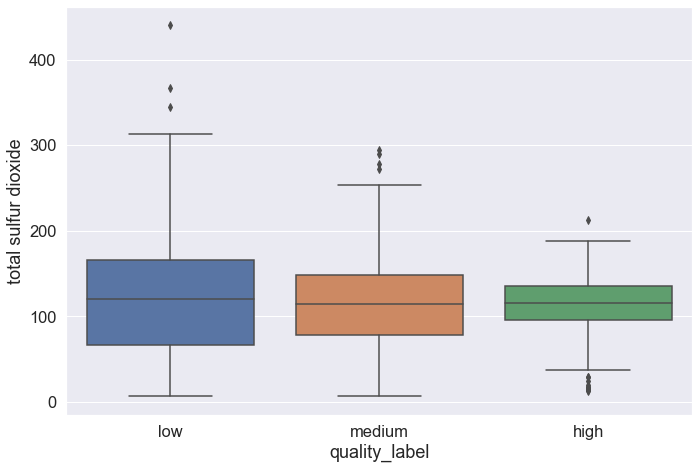

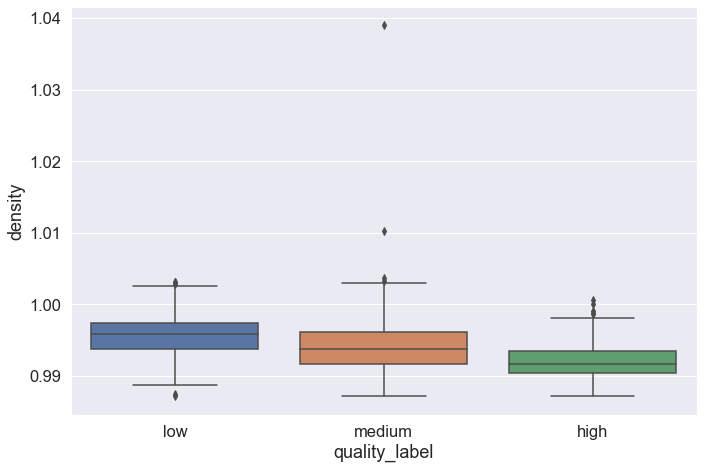

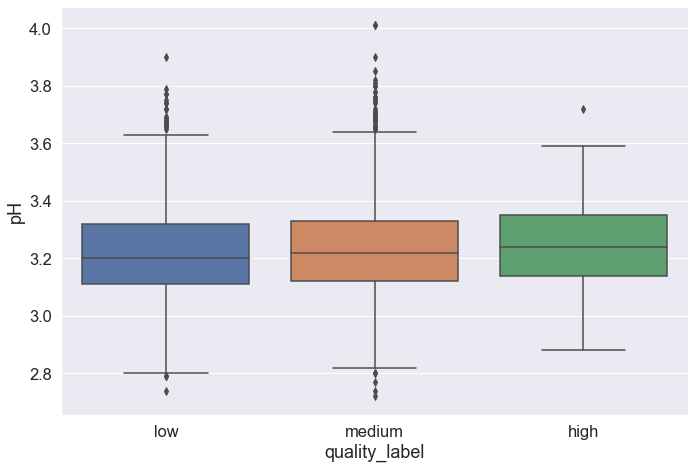

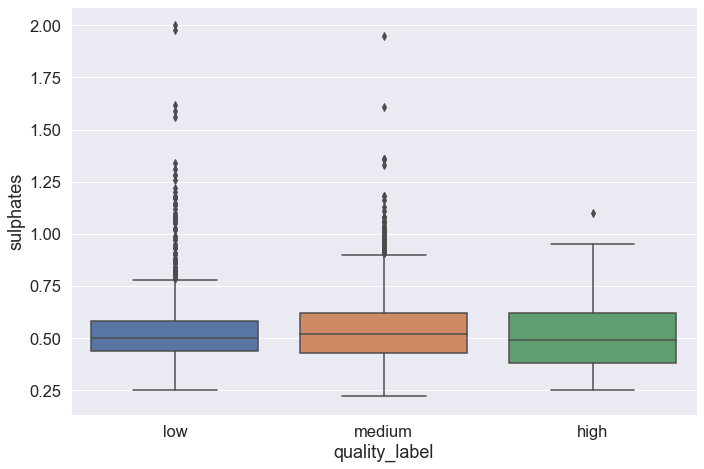

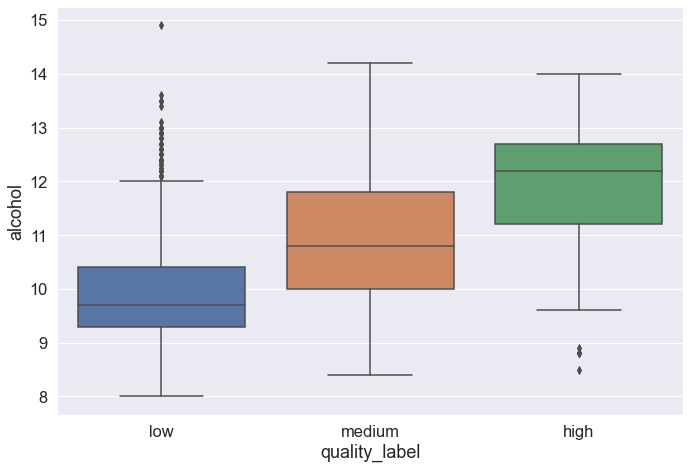

In [18]:
## Red Wine and White Wine Comparison ## 

# With Matplotlib # 

features = wines.select_dtypes(include=['float64']).columns

for feature in features: 

        fig = plt.figure()

        # Seaborn Aesthetics Settings 
        sns.set_theme()
        sns.set_context()
        
        fig.set_size_inches(10,7)
        sns.set(font_scale = 1.5)
        sns.boxplot(x=wines['quality_label'],y=wines[feature])
        
        plt.show()  

#### Observations from Univariate Analysis: 

#### Wine Quality: 
#### Only alcohol shows a clear difference across wine quality. 


### Multivariate Analysis 

In [19]:
wines.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white


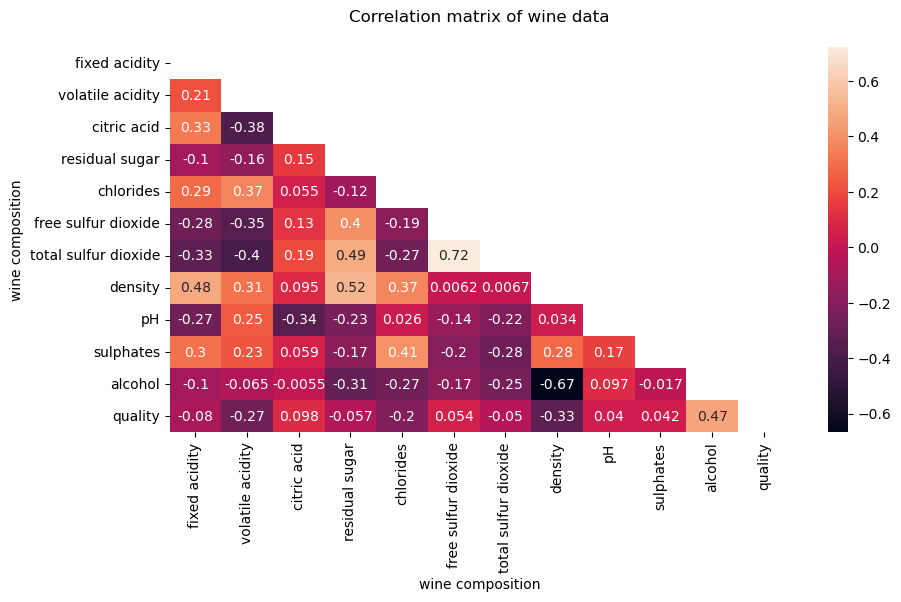

In [20]:
import matplotlib
matplotlib.style.use('default')

fig = plt.figure()
fig.set_size_inches(10,5)

wines_corrmat = wines.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(wines_corrmat)
hm = sns.heatmap(wines_corrmat, annot = True, mask=matrix)
hm.set(xlabel='wine composition', ylabel='wine composition', title = "Correlation matrix of wine data\n")
plt.show()

#### Outlier Removal

In [ ]:
feature = 'fixed acidity'

q1 = wines[feature].quantile(0.25)
q3 = wines[feature].quantile(0.75)
iqr = q3 - q1 
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

wines = wines.loc[(wines[feature] >= lower_bound) & (wines[feature] <= upper_bound)]

# Wine Quality Classification using Machine Learning #

In [21]:
wines.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler # data normalisation with sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [33]:
# Features & Target
X = wines.select_dtypes(include=['float64'])
y = wines['quality_label'] # --> what you're trying to predict

In [34]:
 # --- Encoding Categorical Variables ---#

encoder = LabelEncoder()
wines['quality_label'] = encoder.fit_transform(wines['quality_label'])
wines['quality_label']

/var/folders/k6/c240xsqn2fldrtvqhbv_lqj40000gn/T/ipykernel_33343/3053671352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wines['quality_label'] = encoder.fit_transform(wines['quality_label'])


0       0
1       1
2       2
3       2
4       2
       ..
6490    1
6491    0
6493    2
6494    1
6495    1
Name: quality_label, Length: 5016, dtype: int64

In [35]:
# --- Data Split --- #
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# --- Feature Scaling ---- # 
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

X_train = X_train_norm
X_test = X_test_norm